# Task 1.4 Feature analysis   

- compute correlation between features
- detect highly correlated features -> potential redundant features
- rank importance of features 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.set_option('display.max_columns', None) # show full dataframe

In [4]:
# import data
train_val = pd.read_csv("../data/training_set_values.csv")
train_label = pd.read_csv("../data/training_set_labels.csv")

In [5]:
# merge train_set_values and train_set_labels on ID
train_data = pd.merge(train_val, train_label, on="id")

In [6]:
drop_columns = ["id", "date_recorded", "funder", "installer", "wpt_name", "subvillage", "ward",
                "public_meeting", "recorded_by", "scheme_name"]

duplicated_columns = ["extraction_type", "management_group", "payment_type",
                     "quantity_group", "source_type"]

categorical_columns = ["basin", "region", "lga", "scheme_management", "permit",
                        "extraction_type_group", "extraction_type_class",
                       "management", "payment",
                       "water_quality",  "quality_group", "quantity", "source", "source_class",
                       "waterpoint_type", "waterpoint_type_group", "status_group"]

### Correlation heat map  

1. drop potentially unnecessary columns
2. encoded categorical data
3. normalize data between 0 and 1
4. calculate Pearson corrrelation 

In [7]:
df_heatmap = train_data

# test by dropping unnecessary columns
df_heatmap = df_heatmap.drop(columns=drop_columns)
df_heatmap = df_heatmap.drop(columns=duplicated_columns)


# encode categorical data into numeric data
for col in categorical_columns:
        
    codes, uniques = pd.factorize(df_heatmap[col])
    df_heatmap[f"{col}_encoded"] = codes

df_heatmap

,amount_tsh,gps_height,longitude,latitude,num_private,basin,region,region_code,district_code,lga,population,scheme_management,permit,construction_year,extraction_type_group,extraction_type_class,management,payment,water_quality,quality_group,quantity,source,source_class,waterpoint_type,waterpoint_type_group,status_group,basin_encoded,region_encoded,lga_encoded,scheme_management_encoded,permit_encoded,extraction_type_group_encoded,extraction_type_class_encoded,management_encoded,payment_encoded,water_quality_encoded,quality_group_encoded,quantity_encoded,source_encoded,source_class_encoded,waterpoint_type_encoded,waterpoint_type_group_encoded,status_group_encoded
0,6000.0,1390,34.938093,-9.856322,0,Lake Nyasa,Iringa,11,5,Ludewa,109,VWC,False,1999,gravity,gravity,vwc,pay annually,soft,good,enough,spring,groundwater,communal standpipe,communal standpipe,functional,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.0,1399,34.698766,-2.147466,0,Lake Victoria,Mara,20,2,Serengeti,280,Other,True,2010,gravity,gravity,wug,never pay,soft,good,insufficient,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,1,1,1,1,1,0,0,1,1,0,0,1,1,1,0,0,0
2,25.0,686,37.460664,-3.821329,0,Pangani,Manyara,21,4,Simanjiro,250,VWC,True,2009,gravity,gravity,vwc,pay per bucket,soft,good,enough,dam,surface,communal standpipe multiple,communal standpipe,functional,2,2,2,0,1,0,0,0,2,0,0,0,2,1,1,0,0
3,0.0,263,38.486161,-11.155298,0,Ruvuma / Southern Coast,Mtwara,90,63,Nanyumbu,58,VWC,True,1986,submersible,submersible,vwc,never pay,soft,good,dry,machine dbh,groundwater,communal standpipe multiple,communal standpipe,non functional,3,3,3,0,1,1,1,0,1,0,0,2,3,0,1,0,1
4,0.0,0,31.130847,-1.825359,0,Lake Victoria,Kagera,18,1,Karagwe,0,NaN,True,0,gravity,gravity,other,never pay,soft,good,seasonal,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,1,4,4,-1,1,0,0,2,1,0,0,3,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,10.0,1210,37.169807,-3.253847,0,Pangani,Kilimanjaro,3,5,Hai,125,Water Board,True,1999,gravity,gravity,water board,pay per bucket,soft,good,enough,spring,groundwater,communal standpipe,communal standpipe,functional,2,10,63,4,1,0,0,4,2,0,0,0,0,0,0,0,0
59396,4700.0,1212,35.249991,-9.070629,0,Rufiji,Iringa,11,4,Njombe,56,VWC,True,1996,gravity,gravity,vwc,pay annually,soft,good,enough,river,surface,communal standpipe,communal standpipe,functional,7,0,15,0,1,0,0,0,0,0,0,0,6,1,0,0,0
59397,0.0,0,34.017087,-8.750434,0,Rufiji,Mbeya,12,7,Mbarali,0,VWC,False,0,swn 80,handpump,vwc,pay monthly,fluoride,fluoride,enough,machine dbh,groundwater,hand pump,hand pump,functional,7,17,44,0,0,2,2,0,6,4,4,0,3,0,2,1,0
59398,0.0,0,35.861315,-6.378573,0,Rufiji,Dodoma,1,4,Chamwino,0,VWC,True,0,nira/tanira,handpump,vwc,never pay,soft,good,insufficient,shallow well,groundwater,hand pump,hand pump,functional,7,15,23,0,1,3,2,0,1,0,0,1,5,0,2,1,0


In [8]:
columns_features = ['amount_tsh', 'gps_height', 'longitude', 'latitude', 'num_private',
                    'region_code', 'district_code', 'population', 'construction_year',
                    'basin_encoded', 'region_encoded', 'lga_encoded',
                    'scheme_management_encoded', 'permit_encoded',
                    'extraction_type_group_encoded', 'extraction_type_class_encoded',
                    'management_encoded', 'payment_encoded', 'water_quality_encoded',
                    'quality_group_encoded', 'quantity_encoded', 'source_encoded',
                    'source_class_encoded', 'waterpoint_type_encoded',
                    'waterpoint_type_group_encoded', 'status_group_encoded']

In [9]:
df_heatmap = df_heatmap[columns_features]
df_heatmap = df_heatmap[(df_heatmap["construction_year"] != 0)]
df_heatmap = (df_heatmap-df_heatmap.min())/(df_heatmap.max()-df_heatmap.min())

<Axes: ylabel='Frequency'>

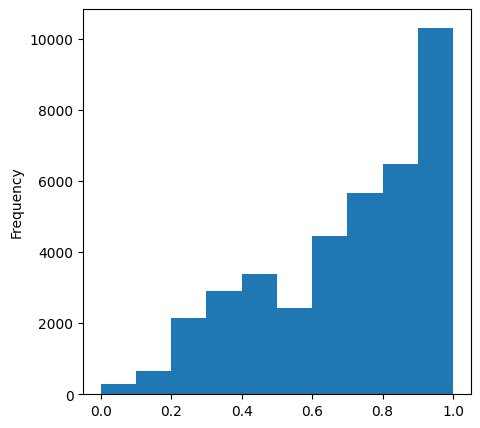

In [10]:
df_heatmap.construction_year.plot(kind="hist", figsize=[5,5])

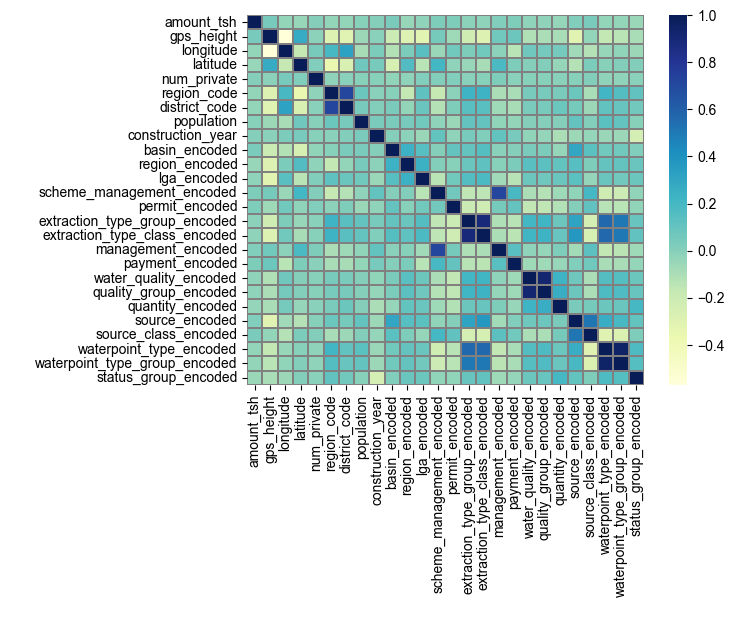

In [11]:
# Compute correlation matrix
co_mtx = df_heatmap.corr(numeric_only=True)

# Plot correlation heatmap
sns.heatmap(co_mtx, cmap="YlGnBu", annot=False, linewidths=0.3, linecolor='gray', xticklabels=True, yticklabels=True)


sns.set_theme(rc={'figure.figsize':(12,10)})


- Correlated with status
    1. quantity
    1. waterpoint
    2. region
    2. extraction_type
    2. water quality
    2. source

### Chi square test

In [12]:
from itertools import product
import numpy as np
import scipy.stats as ss

In [27]:

df_categorical= pd.DataFrame(data = train_data.dtypes, columns = ['a']).reset_index()

categorical_variables = list(df_categorical['index'].loc[df_categorical['a'] == 'object'])
df_categorical = train_data[categorical_variables]


df_cat_v1 = df_categorical.dropna()
print(df_cat_v1.shape)


cat_var1 = (df_cat_v1.columns)
cat_var2 = (df_cat_v1.columns)


## Let us jump to Chi-Square test
## Creating all possible combinations between the above two variables list
cat_var_prod = list(product(cat_var1, cat_var2, repeat = 1))

## Creating an empty variable and picking only the p value from the output of Chi-Square test
result = []
for i in cat_var_prod:
    if i[0] != i[1]:
        result.append((i[0],i[1],list(ss.chi2_contingency(pd.crosstab(df_cat_v1[i[0]], df_cat_v1[i[1]])))[1]))
        
chi_test_output = pd.DataFrame(result, columns = ['var1', 'var2', 'coeff'])
## Using pivot function to convert the above DataFrame into a crosstab
chi_test_df = chi_test_output.pivot(index='var1', columns='var2', values='coeff')

(27171, 31)


In [29]:
chi_test_df

var2,basin,date_recorded,extraction_type,extraction_type_class,extraction_type_group,funder,installer,lga,management,management_group,payment,payment_type,permit,public_meeting,quality_group,quantity,quantity_group,recorded_by,region,scheme_management,scheme_name,source,source_class,source_type,status_group,subvillage,ward,water_quality,waterpoint_type,waterpoint_type_group,wpt_name
var1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
basin,NaN,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.152054e-143,0.000000e+00,0.000000e+00,0.000000e+00,1.0,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
date_recorded,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.0,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
extraction_type,0.000000e+00,0.0,NaN,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.321083e-222,1.744089e-279,0.000000e+00,1.145097e-273,1.145097e-273,1.0,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,6.774586e-305,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
extraction_type_class,0.000000e+00,0.0,0.000000e+00,NaN,0.000000e+00,0.0,0.0,0.0,0.000000e+00,1.929494e-269,0.000000e+00,0.000000e+00,2.633203e-114,8.365510e-120,0.000000e+00,2.825348e-171,2.825348e-171,1.0,0.0,0.000000e+00,0.0,0.000000e+00,1.404237e-108,0.000000e+00,4.878173e-301,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.277940e-128
extraction_type_group,0.000000e+00,0.0,0.000000e+00,0.000000e+00,NaN,0.0,0.0,0.0,0.000000e+00,5.800720e-258,0.000000e+00,0.000000e+00,1.386694e-184,1.471588e-171,0.000000e+00,9.564370e-222,9.564370e-222,1.0,0.0,0.000000e+00,0.0,0.000000e+00,2.898530e-117,0.000000e+00,2.063884e-301,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,4.685252e-221
funder,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.0,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
installer,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,NaN,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.0,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
lga,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.0,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
management,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,NaN,0.000000e+00,0.000000e+00,0.000000e+00,1.370641e-194,0.000000e+00,2.840517e-113,6.443794e-298,6.443794e-298,1.0,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,2.580500e-256,0.0,0.0,1.187439e-108,9.549706e-105,7.676708e-56,0.000000e+00


According to chi test, there is a relationship between stauts group and 
- extraction type
- management
- permit
- public meeting
- quality group
- scheme management
- source
- water quality
- waterpint type group
- wpt name

### Univariant analysis

<Axes: xlabel='status_group'>

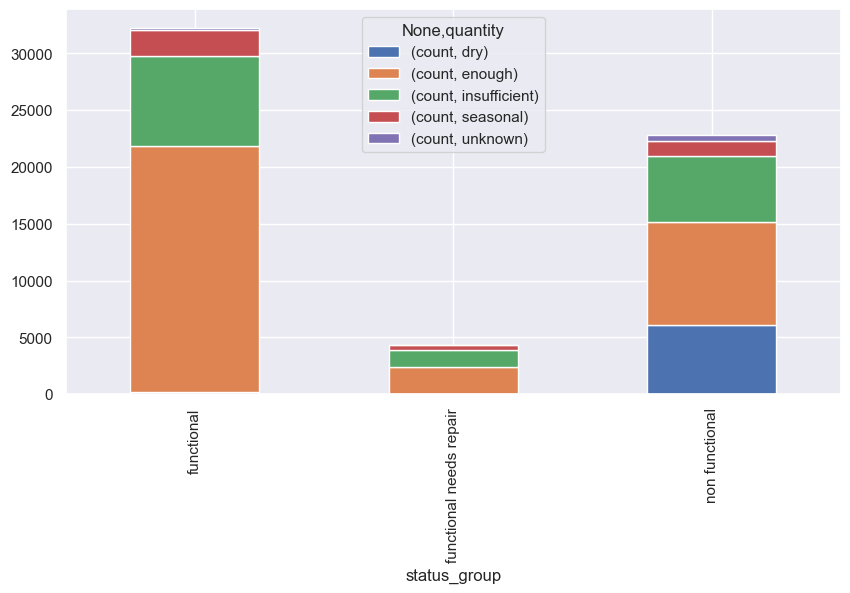

In [14]:
df = pd.DataFrame(train_data.groupby("status_group")["quantity"].value_counts())
df = df.unstack("quantity")
df.plot(kind="bar", stacked=True, figsize=[10, 5])

<Axes: xlabel='status_group'>

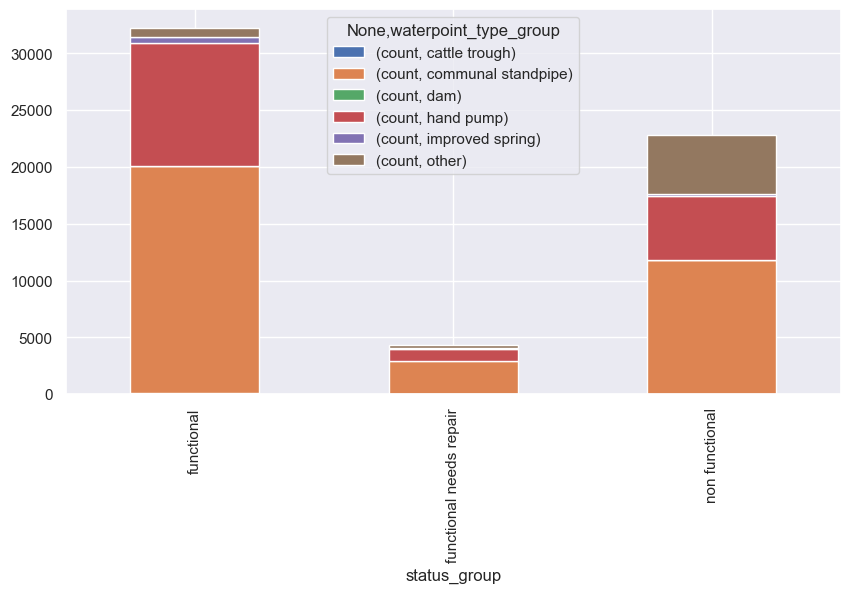

In [15]:
df = pd.DataFrame(train_data.groupby("status_group")["waterpoint_type_group"].value_counts())
df = df.unstack("waterpoint_type_group")
df.plot(kind="bar", stacked=True, figsize=[10, 5])

<Axes: xlabel='region'>

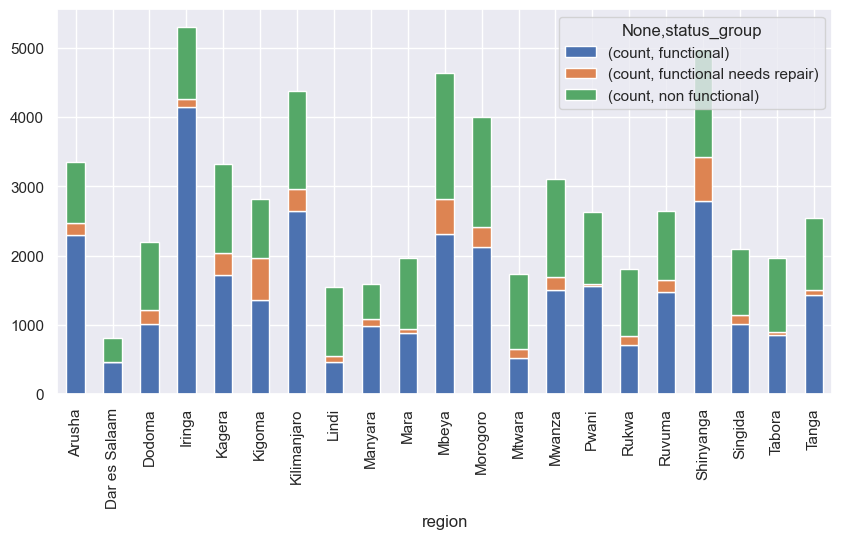

In [16]:
df = pd.DataFrame(train_data.groupby("region")["status_group"].value_counts())
df = df.unstack("status_group")
df.plot(kind="bar", stacked=True, figsize=[10, 5])

<Axes: xlabel='status_group'>

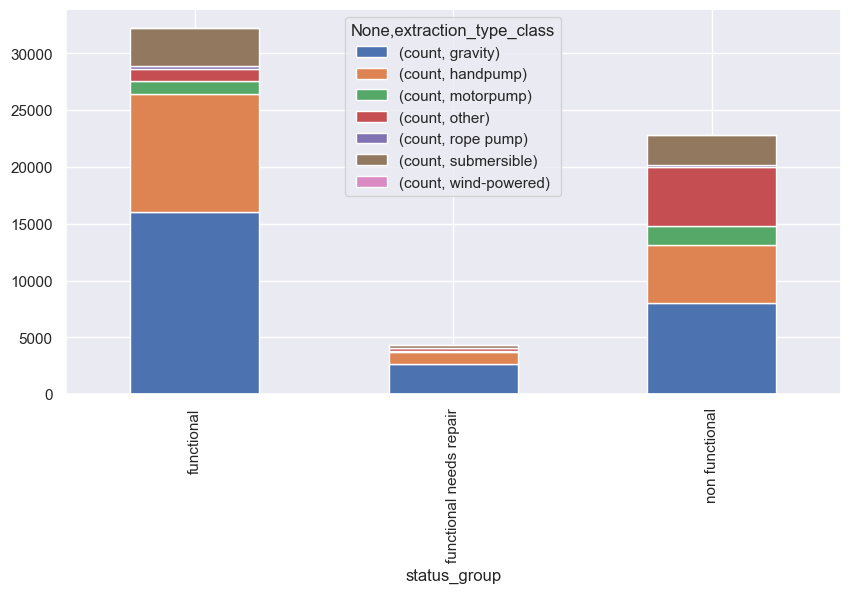

In [17]:
df = pd.DataFrame(train_data.groupby("status_group")["extraction_type_class"].value_counts())
df = df.unstack("extraction_type_class")
df.plot(kind="bar", stacked=True, figsize=[10, 5])

<Axes: xlabel='status_group'>

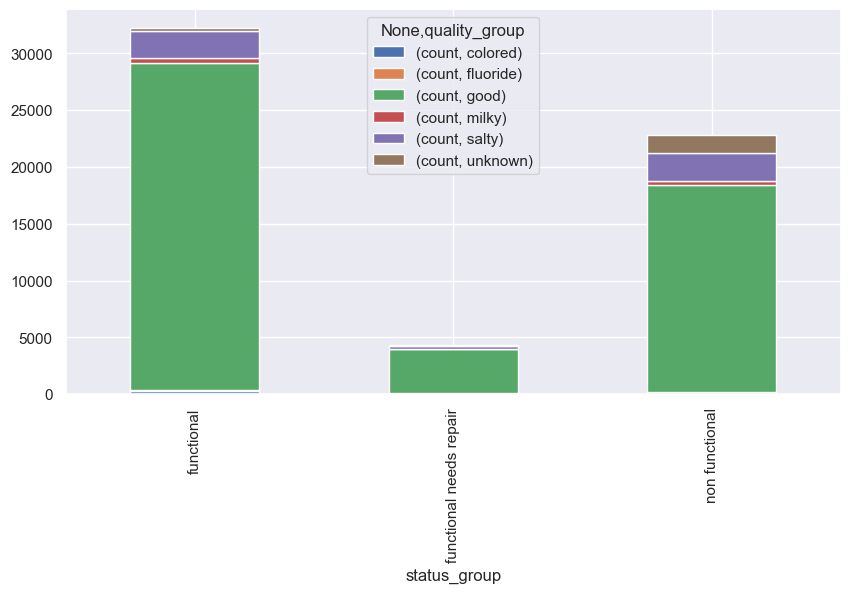

In [18]:
df = pd.DataFrame(train_data.groupby("status_group")["quality_group"].value_counts())
df = df.unstack("quality_group")
df.plot(kind="bar", stacked=True, figsize=[10, 5])

<Axes: xlabel='status_group'>

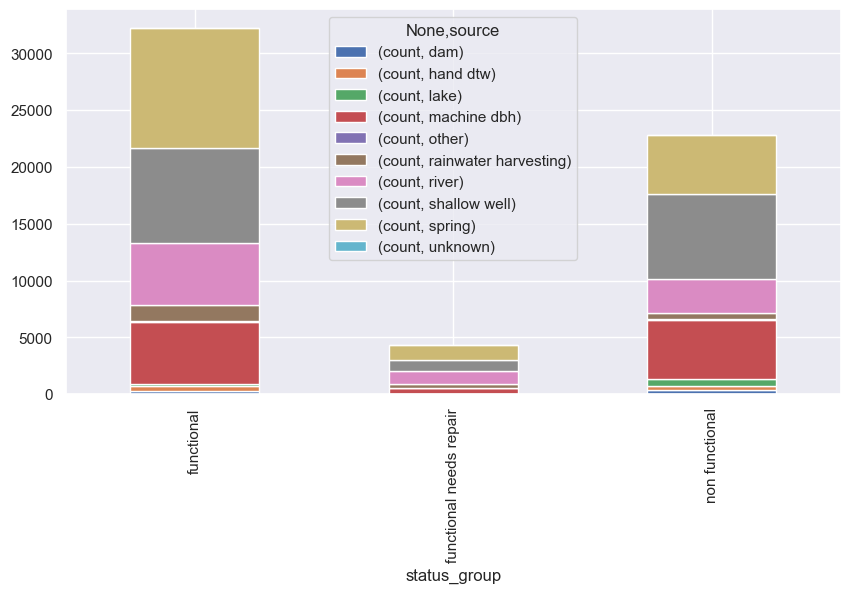

In [19]:
df = pd.DataFrame(train_data.groupby("status_group")["source"].value_counts())
df = df.unstack("source")
df.plot(kind="bar", stacked=True, figsize=[10, 5])

<Axes: xlabel='construction_year'>

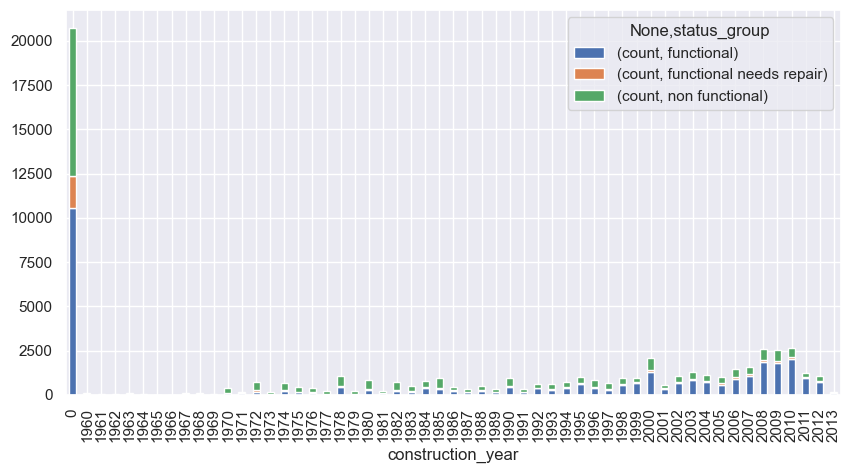

In [20]:
df = pd.DataFrame(train_data.groupby("construction_year")["status_group"].value_counts())
df = df.unstack("status_group")
df.plot(kind="bar", stacked=True, figsize=[10, 5])

<Axes: xlabel='construction_year'>

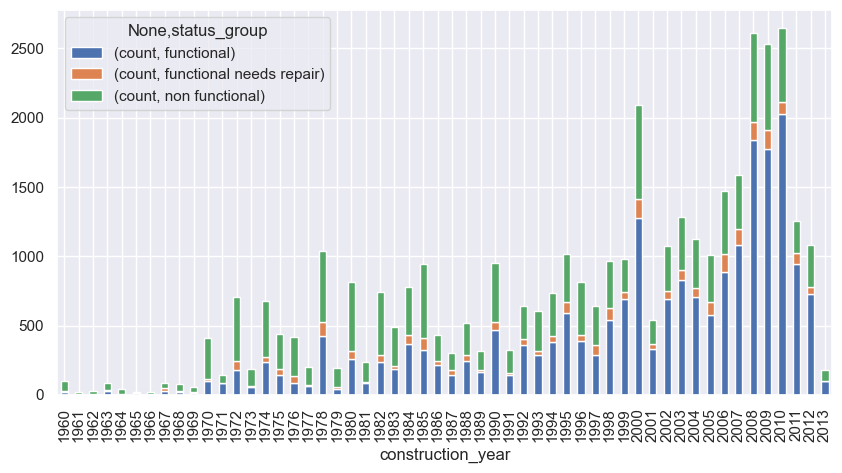

In [21]:
df = train_data.loc[train_data["construction_year"] != 0]
df = pd.DataFrame(df.groupby("construction_year")["status_group"].value_counts())
df = df.unstack("status_group")
df.plot(kind="bar", stacked=True, figsize=[10, 5])